In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Team Members:
### Noor Alawlaqi - S21107270
### Maha Almashharawi- S20106480
### Mashael Alsalamah - S20206926

# Date: 27/11/2024


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction:

The growth of data in recent years has transformed indus
tries and academic fields, bringing in what we now call the era of ”big data.” Big data refers to datasets so large and complex that traditional data processing methods cannot effectively handle them. Defined by the ”three Vs”—volume, velocity, and variety—big data is generated continuously from various sources, including social media, sensors, online transactions, and more. As organizations recognize the potential of this data to provide insights into customer behavior, operational efficiency, and emerging trends, the demand for robust analytical tools has risen sharply [1].

Big data has reshaped decision-making processes across fields. In business, for instance, companies use big data to understand market trends, improve customer engagement, and optimize operations. In this project, we will implement some of the Data Visualisation and Cleaning technieques we learned from our term paper project into an Ecommerce Amazon Sales Data. The Dataset initailly included more than 500000 rows of sales and consisted of the following columns ('Unnamed: 0.1',	'Unnamed: 0',	'name',	'main_category',	'sub_category',	'image',	'link',	'ratings',	'no_of_ratings',	'discount_price',	'actual_price',	'age_group',	'gender',	'income_level',	'region'). This dataset was sourced from Kaggle [2].

# Phase 1: Data cleaning
Data cleaning improves insights by ensuring the dataset is accurate, consistent, and relevant for analysis. Raw datasets often contain errors, such as missing values, duplicates, or inconsistencies, which can skew results and lead to misleading conclusions. By addressing these issues, data cleaning ensures that analyses are based on reliable information.



# Objective
We aimed to Clean and prepare the data for further analysis of trends within the data.

### Data Cleaning and Preparation:
1.   Initial Review: We started by loading and reviewing the dataset.
2.   Data Type Conversion: We removed currency symbols from price columns and converted them into numerical values. The ratings column was cleaned by removing non-numeric values and ensuring that all entries were valid ratings (between 0 and 5). The no_of_ratings column was also converted to numeric to represent the number of customer reviews.
3.   Handling Missing Data: For the discount_price and actual_price columns, missing values were droped.
4.  Handling Outliers in the price columns.
5. Removing Duplicates: Duplicate rows were checked and removed to ensure there was no redundant data in the dataset.

## Step1: Review the Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_dataset (1).csv')
print(data.shape)
data.head()


(551585, 15)


,Unnamed: 0.1,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region
0,0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255",395.988,707.88,26-35,Female,High,North America
1,1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948",557.880,911.88,46-60,Female,High,North America
2,2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206",413.880,743.88,26-35,Male,High,North America
3,3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,455.880,827.88,36-45,Male,High,Australia
4,4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,413.880,813.48,46-60,Male,High,North America


## Step2: Remove unnecessary columns and check for missing values and duplicate entries:

In [ ]:
data_cleaned = data.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'image', 'link'])

# Check for duplicates and missing
duplicates = data_cleaned.duplicated().sum()
missing_values = data_cleaned.isnull().sum()

# Display results of missing values and duplicates
print(missing_values)
print(duplicates)
print(data.shape)
data_cleaned.head()

name                  0
main_category         0
sub_category          0
ratings               0
no_of_ratings         0
discount_price    61163
actual_price      17813
age_group             0
gender                0
income_level          0
region                0
dtype: int64
2172
(551585, 15)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",395.988,707.88,26-35,Female,High,North America
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",557.880,911.88,46-60,Female,High,North America
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",413.880,743.88,26-35,Male,High,North America
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,455.880,827.88,36-45,Male,High,Australia
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,413.880,813.48,46-60,Male,High,North America


## Step3: Remove duplicates and missing values:

In [ ]:
data_cleaned.drop_duplicates()
data_cleaned = data_cleaned.dropna()

data_cleaned.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",395.988,707.88,26-35,Female,High,North America
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",557.880,911.88,46-60,Female,High,North America
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",413.880,743.88,26-35,Male,High,North America
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,455.880,827.88,36-45,Male,High,Australia
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,413.880,813.48,46-60,Male,High,North America


In [ ]:
missing = data_cleaned.isnull().sum()

# Display results of missing values and duplicates
print(missing)
print(data_cleaned.shape)
data_cleaned.head()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
age_group         0
gender            0
income_level      0
region            0
dtype: int64
(490422, 11)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",395.988,707.88,26-35,Female,High,North America
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",557.880,911.88,46-60,Female,High,North America
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",413.880,743.88,26-35,Male,High,North America
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,455.880,827.88,36-45,Male,High,Australia
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,413.880,813.48,46-60,Male,High,North America


## Step4: Review the ratings column values:

In [ ]:
unique_ratings = data_cleaned['ratings'].unique()
print(unique_ratings)

['4.2' '4.0' '4.1' '4.3' '3.9' '3.8' '3.5' '0' '4.6' '3.3' '3.4' '3.7'
 '2.9' '5.0' '4.4' '3.6' '2.7' '4.5' '3.0' '3.1' '4.8' '4.7' '3.2' '2.5'
 '1.0' '2.6' '2.8' '1.7' 'Get' '1.8' '2.4' '4.9' '2.2' '1.6' '1.9' '2.3'
 '2.0' '1.4' '2.1' 'FREE' '1.2' '1.3' '1.5' '₹65' '1.1' '₹70' '₹100' '₹99'
 '₹2.99']


## Step5: Fix the ratings column values:

In [ ]:
data_cleaned['ratings'] = pd.to_numeric(data_cleaned['ratings'], errors='coerce')
data_cleaned['no_of_ratings'] = pd.to_numeric(data_cleaned['no_of_ratings'], errors='coerce')

# Remove any entries where ratings are greater than 5 (invalid ratings)
data_cleaned = data_cleaned[data_cleaned['ratings'] <= 5]
data_cleaned['ratings'].unique()


array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, 0. , 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 4.8, 4.7, 3.2, 2.5, 1. , 2.6,
       2.8, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2.3, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

## Step6: Remove unwanted char from the product names:

In [ ]:
data_cleaned['name'] = data_cleaned['name'].str.replace('$', '', regex=False)

## Step7: Recheck the missing values as we have removed some wrong entries:

In [ ]:
missing = data_cleaned.isnull().sum()

print(missing)

name                  0
main_category         0
sub_category          0
ratings               0
no_of_ratings     27445
discount_price        0
actual_price          0
age_group             0
gender                0
income_level          0
region                0
dtype: int64


## Step8: Remove the missing values found:

In [ ]:
data_cleaned = data_cleaned.dropna()
print(data_cleaned.shape)
data_cleaned.head()

(457260, 11)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,455.880,827.88,36-45,Male,High,Australia
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,413.880,813.48,46-60,Male,High,North America
8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,4.1,674.0,371.880,698.28,36-45,Female,High,Europe
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,4.0,801.0,455.988,887.88,46-60,Female,High,South America
10,"Daikin 1 Ton 3 Star Inverter Split AC (Copper,...",appliances,Air Conditioners,4.2,558.0,395.880,578.40,26-35,Female,High,North America


# Phase 2 : Exploratory Data Analysis (EDA)

 This is a crucial step in understanding the dataset and uncovering meaningful patterns. This process began with statistical summaries to examine key metrics such as mean, median, and variance for numerical features, which highlighted data distributions and revealed skewness or zero-inflated values. Following this, initial visualizations were employed to explore relationships between categorical and numerical variables, identifying dominant categories, trends, and potential outliers. These steps provided a foundational understanding of the dataset, guiding the focus of deeper analysis and ensuring meaningful insights could be derived from subsequent visualizations.

## Step 1: Statistical Summaries

In [ ]:
data_cleaned.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,457260.000000,457260.000000,457260.000000,4.572600e+05
mean,2.549978,59.653210,31.341011,3.130854e+02
std,1.890292,146.745422,115.457911,1.756884e+05
min,0.000000,0.000000,0.096000,1.200000e-01
25%,0.000000,0.000000,4.668000,1.198800e+01
50%,3.500000,4.000000,8.028000,1.918800e+01
75%,4.000000,34.000000,16.740000,3.598800e+01
max,5.000000,999.000000,14999.880000,1.188000e+08


## Step 2: Adding meaningfull columns

In [ ]:
#Creating a discount precentage column by calculating it
data_cleaned['discount_percentage'] = ((data_cleaned['actual_price'] - data_cleaned['discount_price']) / data_cleaned['actual_price']) * 100
#Also Calc the difference
data_cleaned['price_difference'] = data_cleaned['actual_price'] - data_cleaned['discount_price']
data_cleaned.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region,discount_percentage,price_difference
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,455.880,827.88,36-45,Male,High,Australia,44.934048,372.000
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,413.880,813.48,46-60,Male,High,North America,49.122289,399.600
8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,4.1,674.0,371.880,698.28,36-45,Female,High,Europe,46.743427,326.400
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,4.0,801.0,455.988,887.88,46-60,Female,High,South America,48.643060,431.892
10,"Daikin 1 Ton 3 Star Inverter Split AC (Copper,...",appliances,Air Conditioners,4.2,558.0,395.880,578.40,26-35,Female,High,North America,31.556017,182.520


In [ ]:
#now defining the product price class, so we can then later visualize the distribution of each class
def classify_price(price):
    if price < 20:
        return 'Low'
    elif price < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['price_category'] = data_cleaned['discount_price'].apply(classify_price)

In [ ]:
#now defining the product rating count class,
# Which will tell us how popular the product is (How many people viewed and rated it)
#so we can then later visualize the distribution of each class
def classify_popularity(ratings_count):
    if ratings_count < 100:
        return 'Low'
    elif ratings_count < 1000:
        return 'Moderate'
    else:
        return 'High'

In [ ]:
data_cleaned['popularity_level'] = data_cleaned['no_of_ratings'].apply(classify_popularity)

In [ ]:
#now defining the product rating class,
# Which will tell us how well rated the product is
#so we can then later visualize the distribution of each class
def classify_rating(rating):
    if pd.isnull(rating):
        return 'Unknown'
    elif rating < 2.5:
        return 'Poor'
    elif rating < 3.5:
        return 'Average'
    elif rating < 4.5:
        return 'Good'
    else:
        return 'Excellent'

In [ ]:
data_cleaned['rating_category'] = data_cleaned['ratings'].apply(classify_rating)

In [ ]:
print(data_cleaned.shape)
data_cleaned.head()

(457260, 16)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,age_group,gender,income_level,region,discount_percentage,price_difference,price_category,popularity_level,rating_category
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,455.880,827.88,36-45,Male,High,Australia,44.934048,372.000,High,Low,Good
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,413.880,813.48,46-60,Male,High,North America,49.122289,399.600,High,Moderate,Good
8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,4.1,674.0,371.880,698.28,36-45,Female,High,Europe,46.743427,326.400,High,Moderate,Good
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,4.0,801.0,455.988,887.88,46-60,Female,High,South America,48.643060,431.892,High,Moderate,Good
10,"Daikin 1 Ton 3 Star Inverter Split AC (Copper,...",appliances,Air Conditioners,4.2,558.0,395.880,578.40,26-35,Female,High,North America,31.556017,182.520,High,Moderate,Good


In [ ]:
numeric_columns = ['discount_price', 'actual_price']

# Define a function to detect outliers using IQR (Interquartile Range)
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(data_cleaned, numeric_columns)

# Display outliers for each numeric column
outliers_df = {col: outliers[col][col] for col in outliers}
outliers_df = pd.DataFrame(outliers_df)
outliers_df.head()

,discount_price,actual_price
3,455.880,827.88
4,413.880,813.48
8,371.880,698.28
9,455.988,887.88
10,395.880,578.40


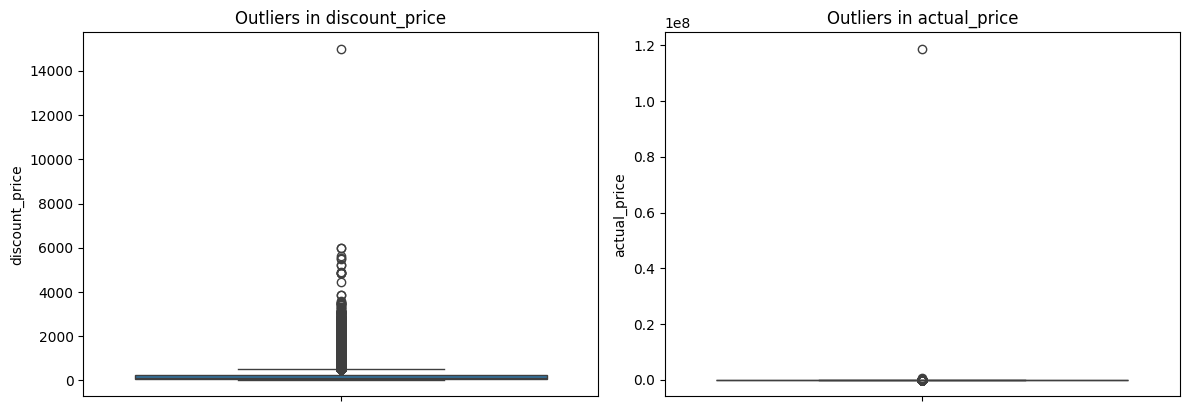

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=outliers_df[column])
    plt.title(f"Outliers in {column}")
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows where values are outside the IQR bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the relevant columns in the dataset
data_cleaned = remove_outliers(data_cleaned, numeric_columns)

In [ ]:
data_cleaned.shape

(380690, 16)

#Q1:What is the distribution of products across different main categories?

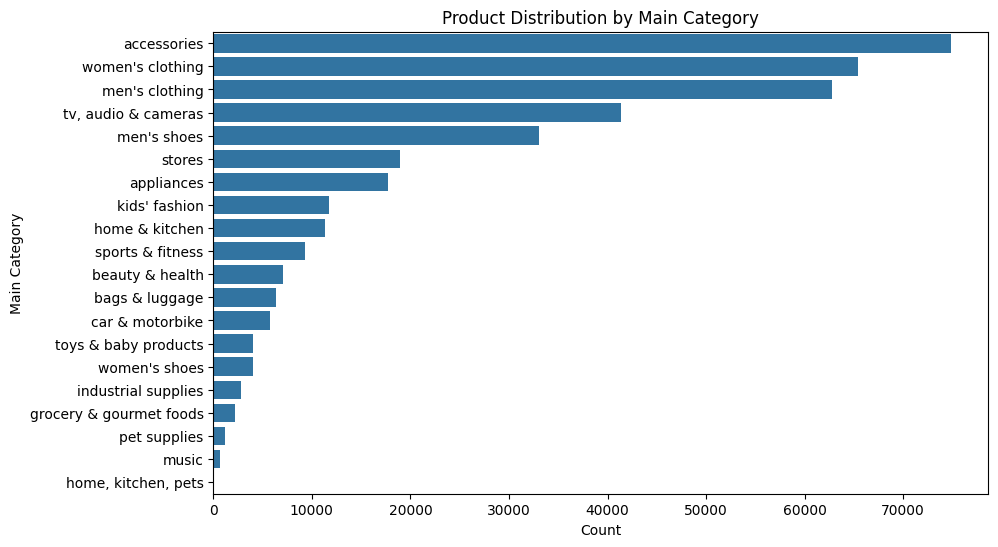

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='main_category', data=data_cleaned, order=data_cleaned['main_category'].value_counts().index)
plt.title('Product Distribution by Main Category')
plt.xlabel('Count')
plt.ylabel('Main Category')
plt.show()

## Answer:
The distribution of products across main categories from the plot above revealed which categories dominated the market. Horizontal bar charts showed that categories like "accessories" and "Women's Clothing" were most prevalent, suggesting these are key areas of focus. Conversely, less-represented categories like "home,kitchen,pets" highlighted a potential area for growth.

# Q2: How do discount prices vary across different main categories?

## This plot below showcases the distribution, and it is clear that there are a lot of outliers in the prices that need to be handled so we went back to the cleaning process to make sure we do that.

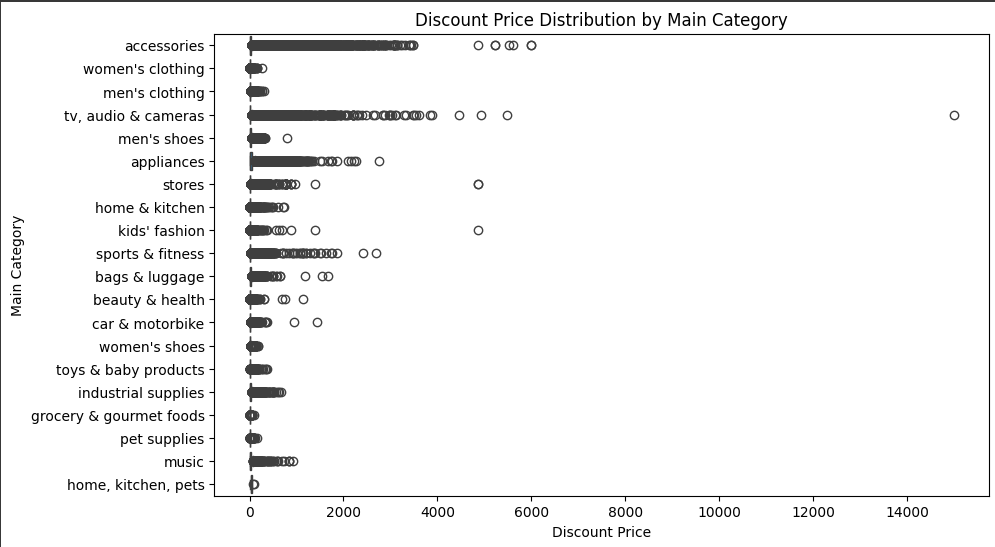

## This below plot is the distribution after handling the outliers in the data.

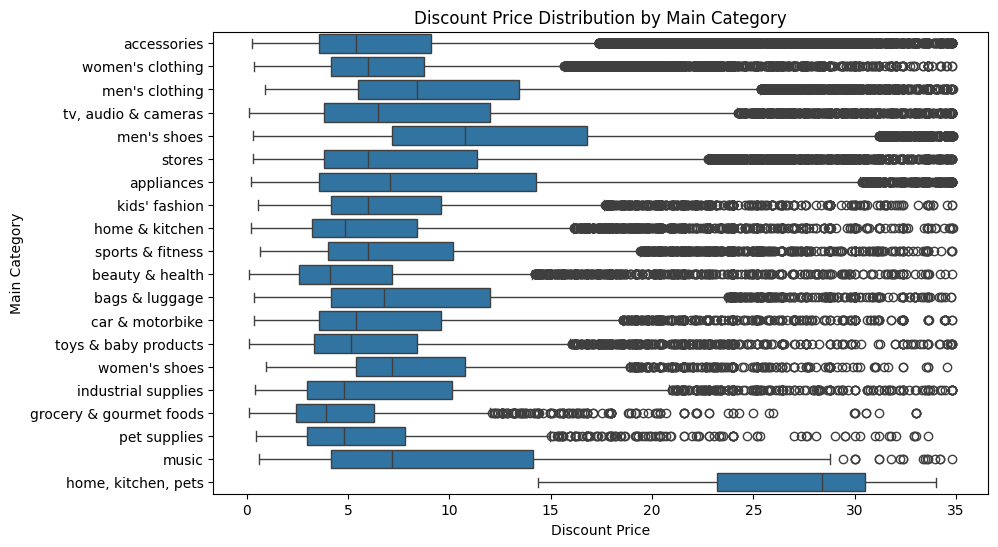

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x ='discount_price', y='main_category', data=data_cleaned, order=data_cleaned['main_category'].value_counts().index)
plt.title('Discount Price Distribution by Main Category')
plt.xlabel('Discount Price')
plt.ylabel('Main Category')
plt.show()

## Answer:
Next, the box plot above was used to explore the distribution of discount prices across categories. This visualization revealed significant variability, with some categories showing a broader range of discounts, such as "accessories" which likely cater to price-sensitive consumers. On the other hand, categories with narrow discount ranges may reflect a firm pricing strategy or a lack of competition.

# Q3:What is the relationship between discount prices and product ratings?

## This below plot is before handling the outliers:

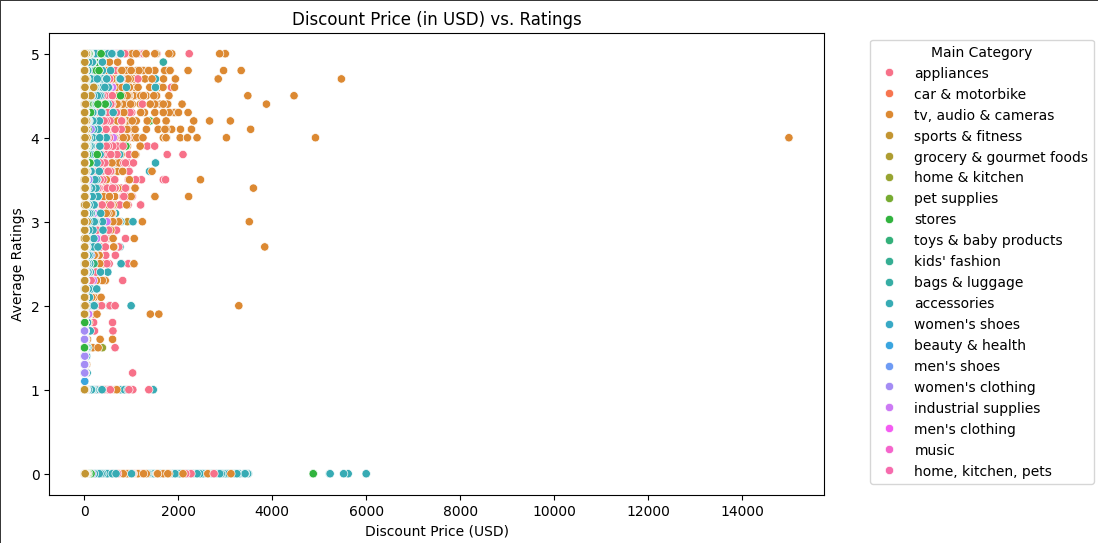

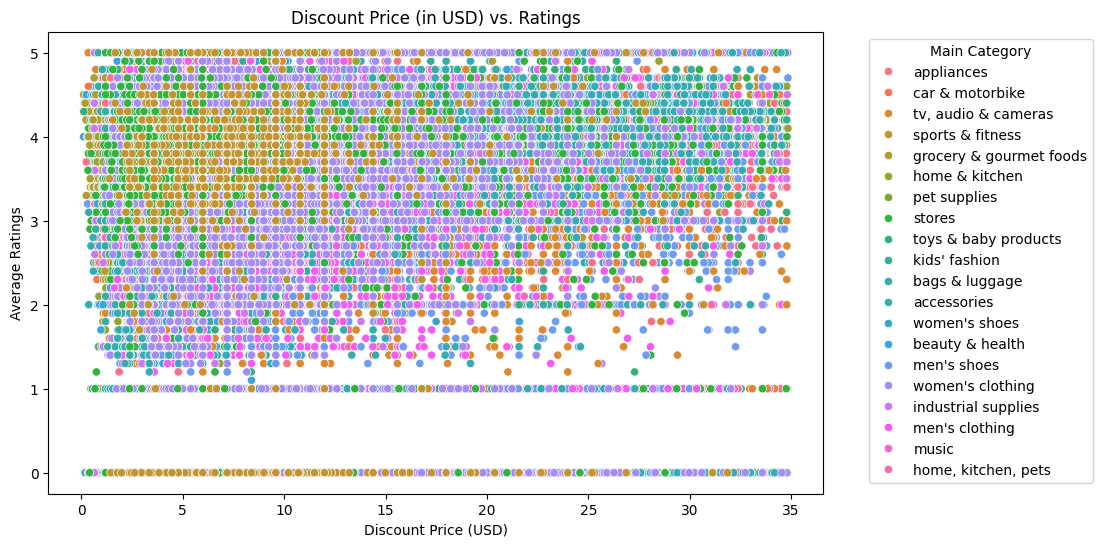

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_price', y='ratings', data=data_cleaned, hue='main_category')
plt.title('Discount Price (in USD) vs. Ratings')
plt.xlabel('Discount Price (USD)')
plt.ylabel('Average Ratings')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Answer:
This scatter plot was employed to examine the relationship between discount prices and ratings. This visualization highlighted that higher discounts did not necessarily correlate with better ratings. Clusters in specific price and rating ranges indicated distinct consumer preferences within categories. Additionally, outliers, such as highly rated low-priced products, represented potential value-for-money offerings.

# Q4: How are products ratings distributed across main categories?

<ipython-input-195-21f7cc3e32d5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=category_data, ax=ax, order=["Excellent", "Good", "Average", "Poor"], palette='muted')
<ipython-input-195-21f7cc3e32d5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=category_data, ax=ax, order=["Excellent", "Good", "Average", "Poor"], palette='muted')
<ipython-input-195-21f7cc3e32d5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=category_data, ax=ax, order=["Excellent"

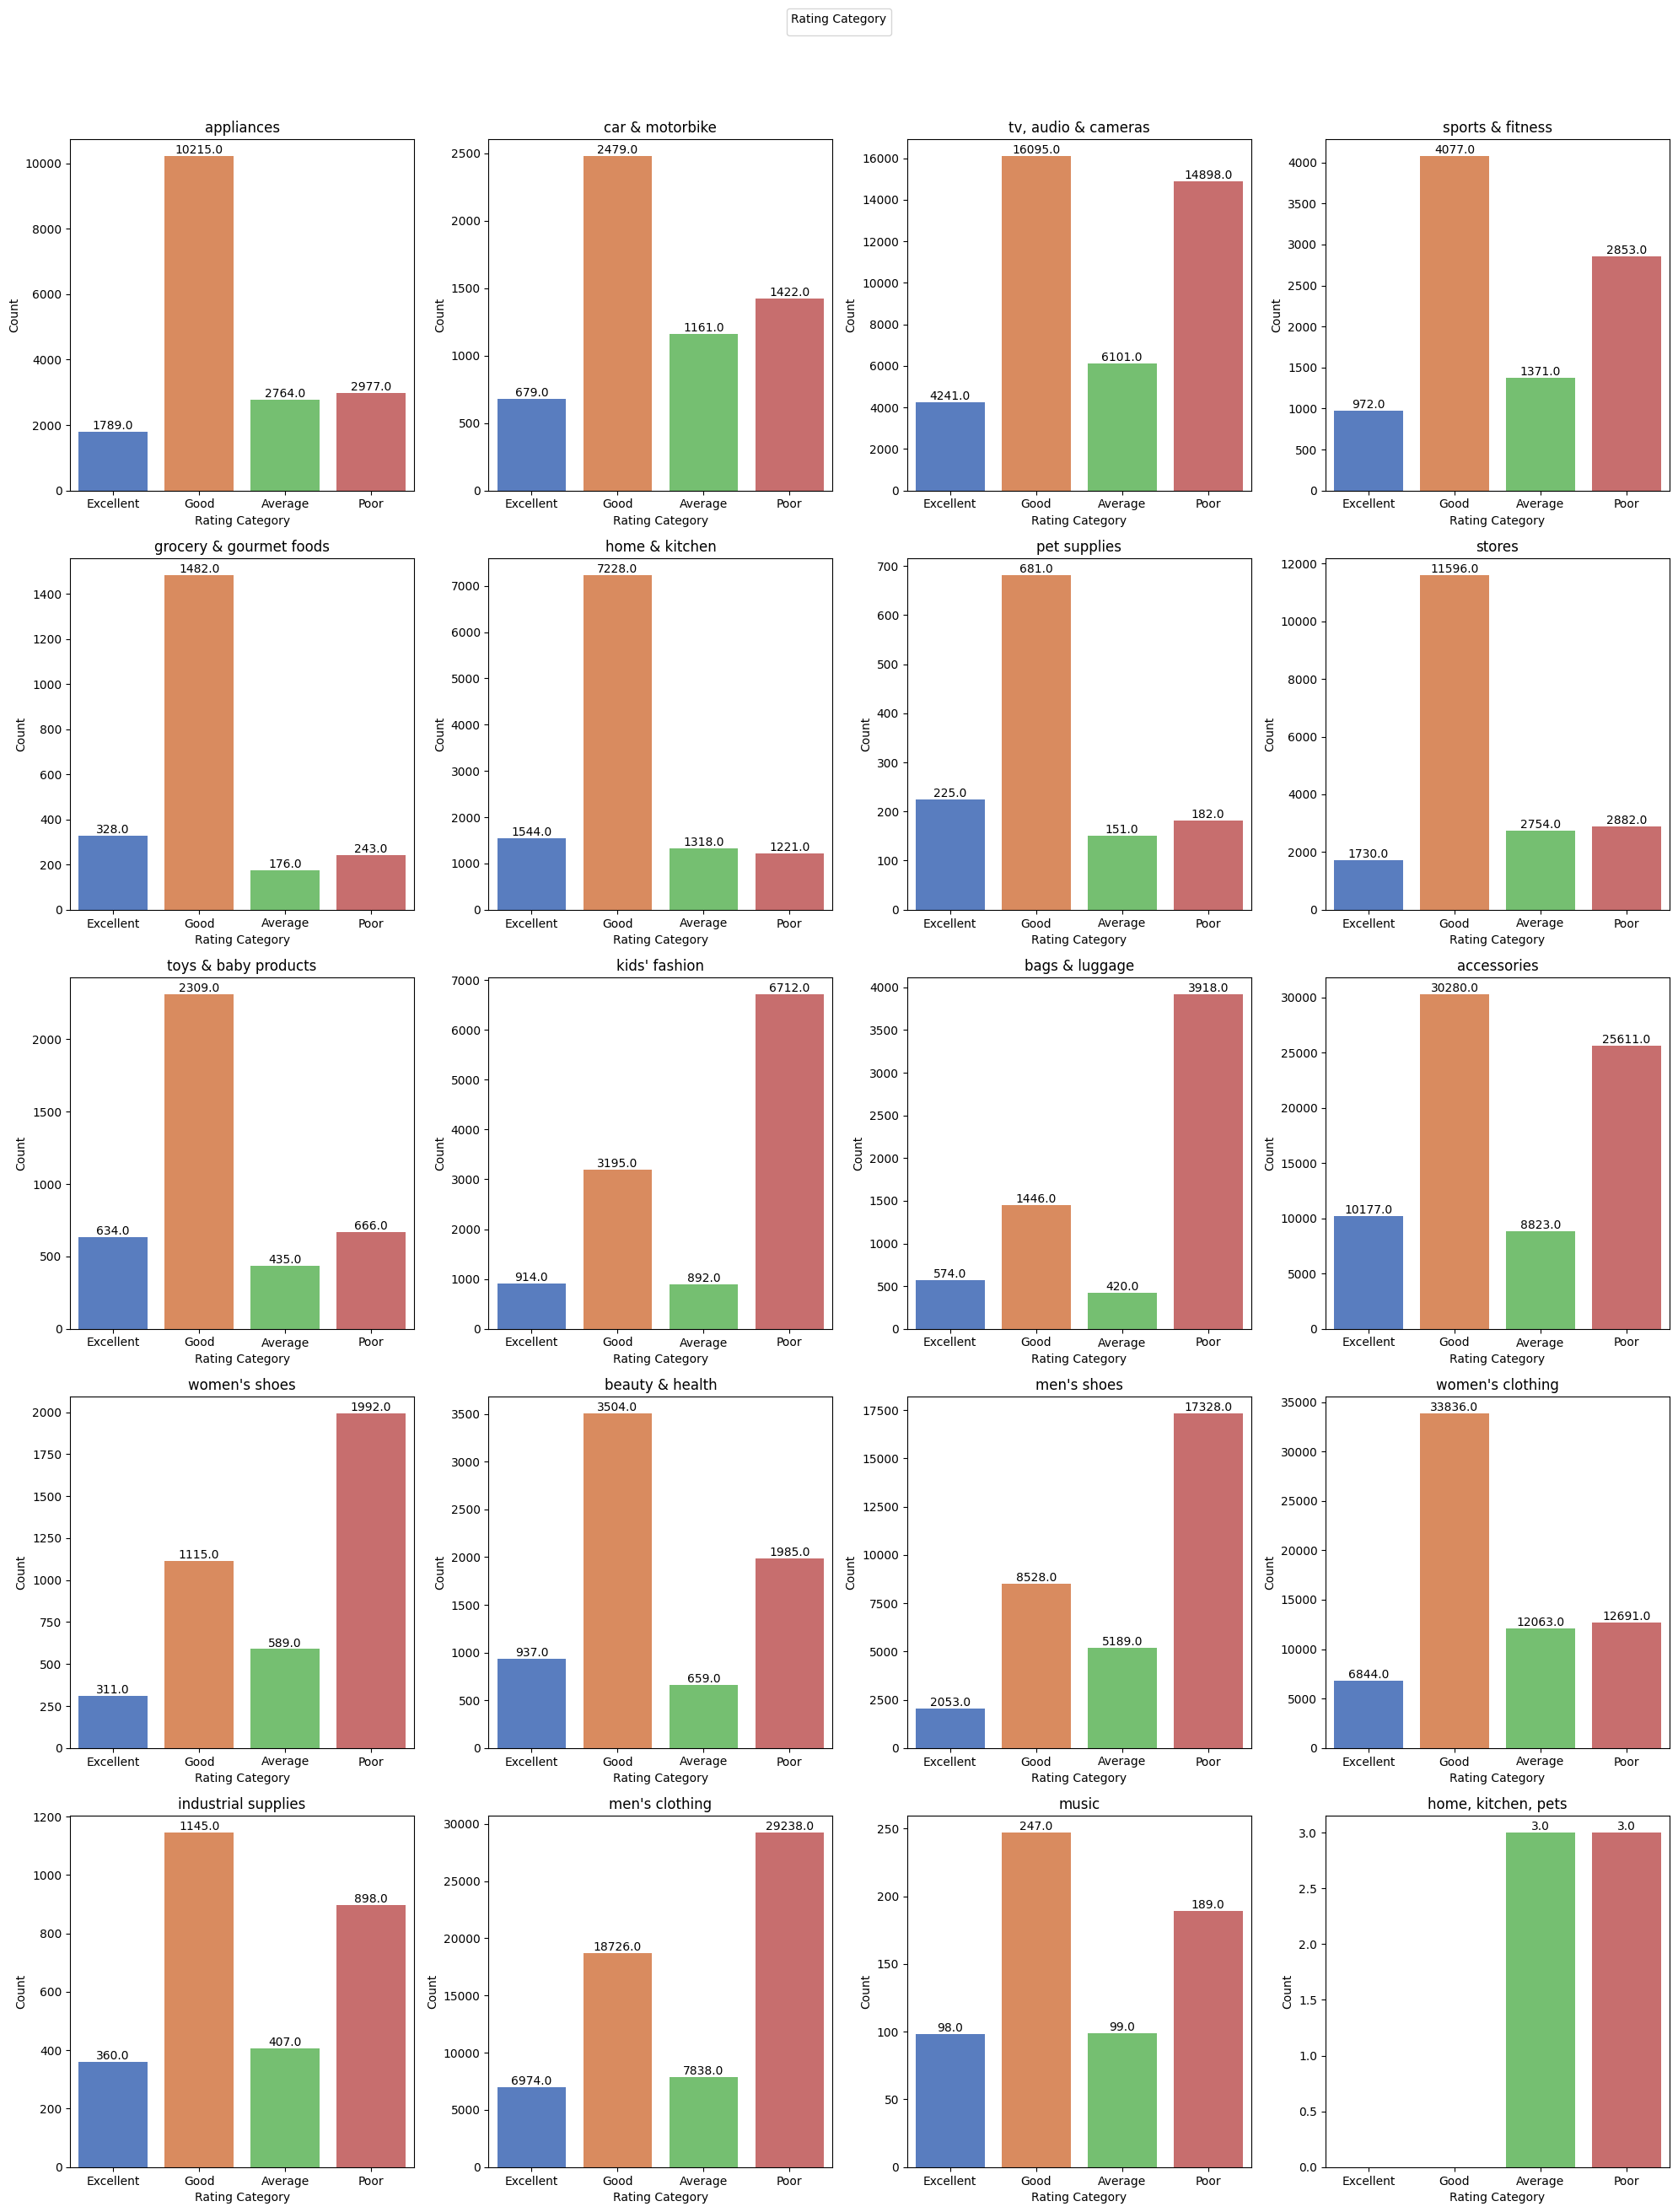

In [ ]:
# List of unique main categories
categories = data_cleaned['main_category'].unique()

# Set up the plot grid: 4 plots per row
n_cols = 4
n_rows = (len(categories) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array to iterate over it more easily
axes = axes.flatten()

# Loop through each category and plot
for i, category in enumerate(categories):
    ax = axes[i]
    # Filter data for the current category
    category_data = data_cleaned[data_cleaned['main_category'] == category]
    # Plot countplot
    sns.countplot(x='rating_category', data=category_data, ax=ax, order=["Excellent", "Good", "Average", "Poor"], palette='muted')
    # Set title and labels
    ax.set_title(category)
    ax.set_xlabel("Rating Category")
    ax.set_ylabel("Count")
    # Add value labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Add legend inside the plot grid, avoiding space at the end of the last row
fig.legend(title="Rating Category", loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

# Show the plot
plt.show()


## Answer:
To further analyze ratings, this grouped bar chart displayed the distribution of products by rating categories within each main category. This chart showed that some categories, such as "Women's Clothing" had a higher proportion of highly rated products, indicating strong customer satisfaction. In contrast, categories like "accessories" with many low-rated products revealed opportunities for quality improvement.

# Q5: What are the average product ratings across main categories?

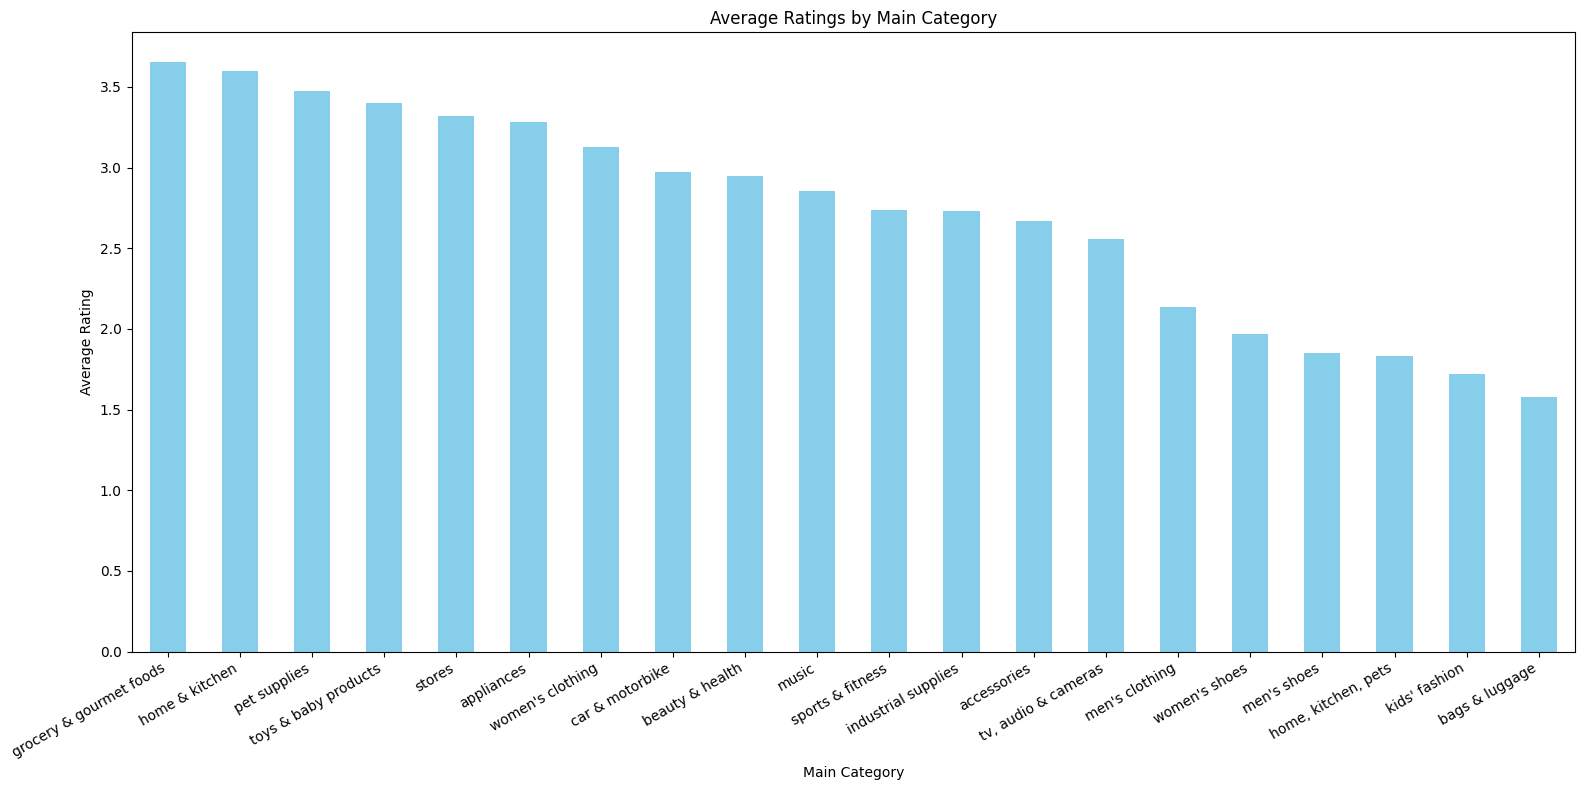

In [ ]:
category_ratings = data_cleaned.groupby('main_category')['ratings'].mean().sort_values(ascending=False)

# Plotting the Most Rated Categories
plt.figure(figsize=(16, 8))
category_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## Answer:
We explored average ratings across categories through the above chart. This bar chart of average ratings showed which categories consistently received better feedback from customers. High average ratings are from the "Grocery & Food" category which suggested strong consumer approval in that category, while lower ratings average from the "bags & luggage" pointed that it should be an area for improvement.

# Q6: How do purchases vary across different age groups and income levels?

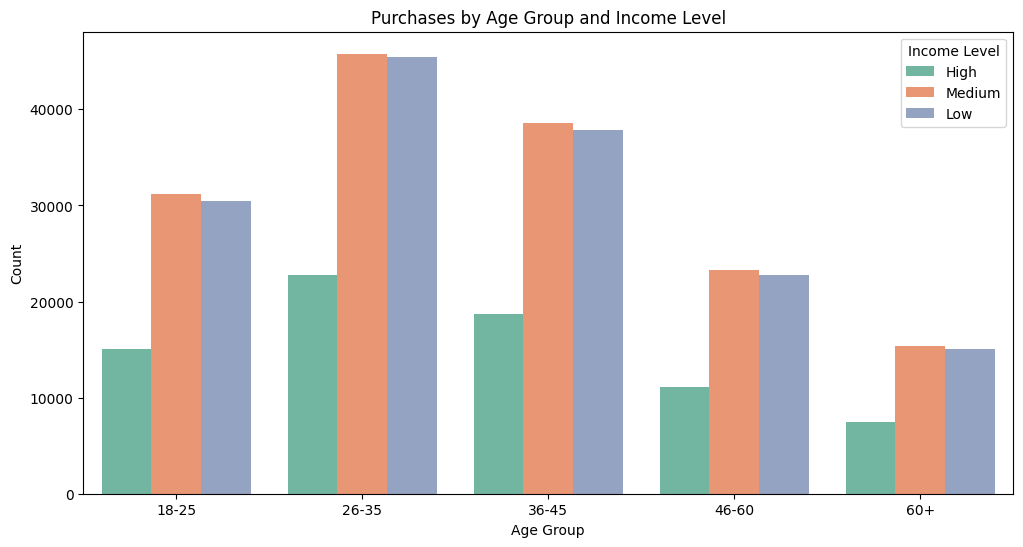

In [ ]:
age_order = ["18-25", "26-35", "36-45", "46-60", "60+"]

# Plot with the specified order
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='income_level', data=data_cleaned, palette='Set2', order=age_order)
plt.title('Purchases by Age Group and Income Level')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.show()

## Answer:
This demographic analysis provided additional insights. This grouped bar chart of purchases by age group and income level revealed that individuals aged 26-35 made the most purchases, particularly in the medium to low-income groups. Older age groups and lower-income levels were less active, indicating potential untapped markets.

# Q7: What is the average spending across different income levels based on discounted prices?

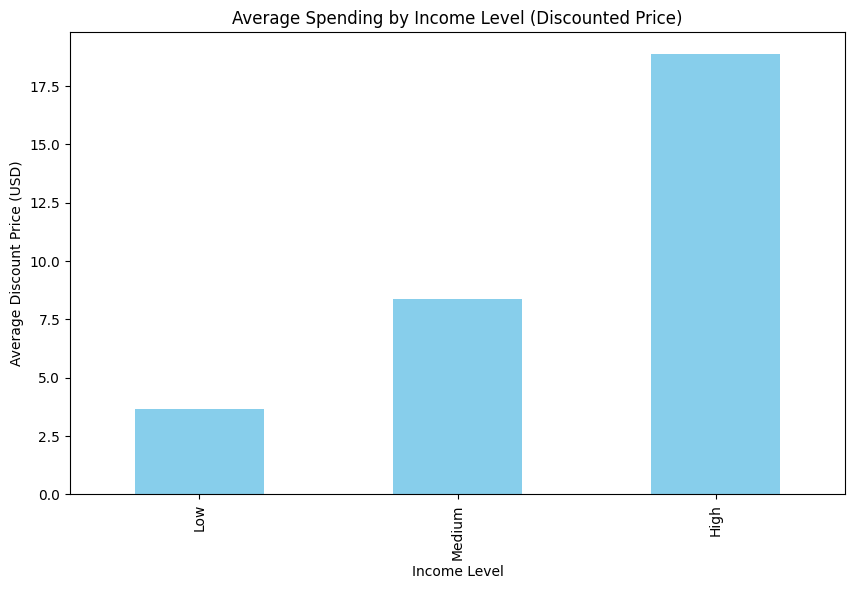

In [ ]:
income_spending = data_cleaned.groupby('income_level')['discount_price'].mean().sort_values()

plt.figure(figsize=(10, 6))
income_spending.plot(kind='bar', color='skyblue')
plt.title('Average Spending by Income Level (Discounted Price)')
plt.xlabel('Income Level')
plt.ylabel('Average Discount Price (USD)')
plt.show()


## Answer:
Another bar chart analyzed average spending based on discounted prices across income levels. It revealed that higher-income individuals tended to spend more on average, likely reflecting their preference for premium products or reduced sensitivity to discounts. Lower-income levels showed moderate spending, indicating a stronger focus on affordability.

# Q8: What is the sales distribution across regions?

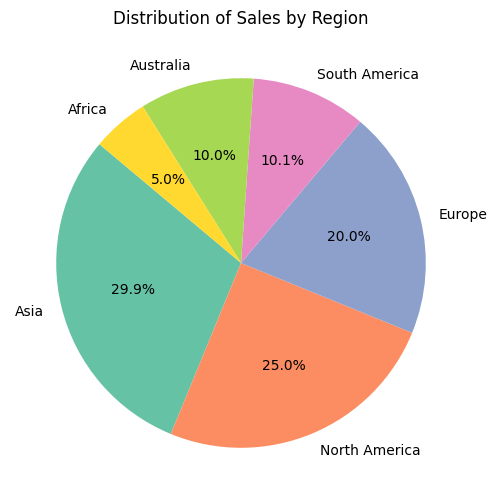

In [ ]:
plt.figure(figsize=(10, 6))
data_cleaned['region'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
)
plt.title('Distribution of Sales by Region')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.show()

# Answer:
This pie chart illustrated the distribution of sales across regions. Regions like "Asia" and "North America" dominated sales, reflecting established markets. In contrast, underrepresented regions such as "Africa" indicated opportunities for growth through targeted marketing and localization strategies.

# Q9: How does the distribution of buyers by gender vary across different product categories?

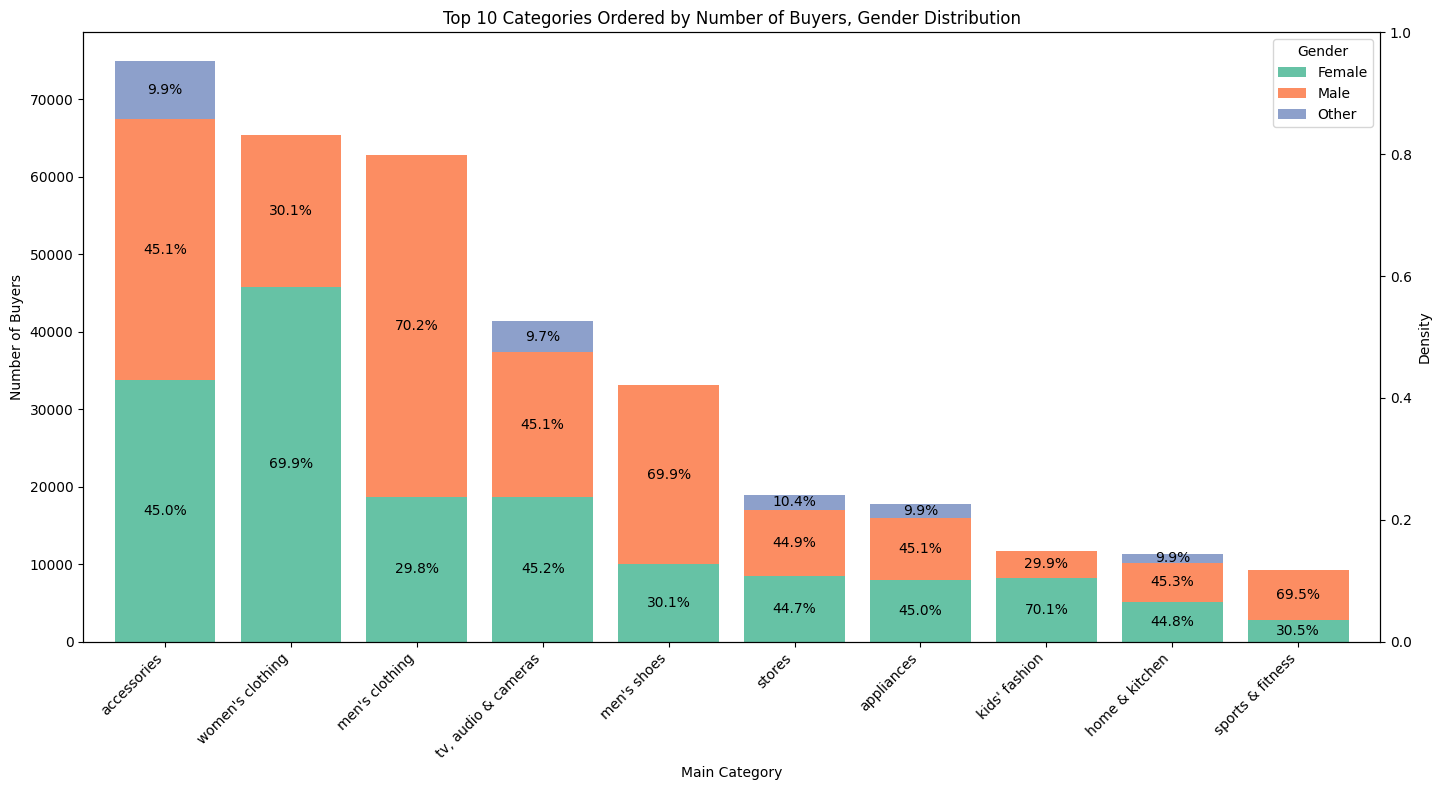

In [ ]:
category_gender_distribution = data_cleaned.groupby(['main_category', 'gender']).size().unstack()
category_totals = category_gender_distribution.sum(axis=1)
ordered_categories = category_totals.sort_values(ascending=False).index

# Reorder the DataFrame based on sorted categories
category_gender_distribution = category_gender_distribution.loc[ordered_categories]

top_10_categories = category_totals.nlargest(10).index
category_gender_distribution_top_10 = category_gender_distribution.loc[top_10_categories]

# Plot the sorted stacked bar chart with top 10 categories
plt.figure(figsize=(14, 8))
ax = category_gender_distribution_top_10.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62', '#8da0cb'], width=0.8, ax=plt.gca())
plt.title('Top 10 Categories Ordered by Number of Buyers, Gender Distribution')
plt.xlabel('Main Category')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()

# Add KDE plot on secondary axis (as per original code)
plt.twinx()  # Create a secondary y-axis for KDE
plt.ylabel('Density')

# Annotate each bar with the percentage only
for i, category in enumerate(category_gender_distribution_top_10.index):
    total = category_totals[category]  # Total buyers in the category
    bottom = 0  # Start of the first part of the bar

    for gender, value in category_gender_distribution_top_10.loc[category].items():
        # Calculate the percentage
        percentage = value / total * 100

        # Annotate the bar segment with percentage only
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black')

        # Update the bottom for the next segment in the stack
        bottom += value

plt.show()

# Answer:
This plot illustrates the distribution of buyers by gender across various product categories, revealing significant patterns in consumer demographics. Categories like "Women's Clothing" and "Accessories" have a high proportion of female buyers, which aligns with the expected customer base for these products. In contrast, "Men's Clothing" and "Men's Shoes" are predominantly purchased by male buyers. Interestingly, some categories, such as "TV, Audio & Cameras" and "Appliances," exhibit a more balanced distribution across genders, suggesting that these products have broad appeal to both male and female consumers. This insight into gender distribution can inform targeted marketing strategies, enabling brands to cater to specific gender preferences or adopt a more inclusive approach for categories with a balanced demographic.

# Conclusion
This report provides a comprehensive analysis of product sales data, focusing on uncovering insights into consumer behavior, pricing patterns, demographic trends, and regional sales distribution. The project began with data cleaning to ensure reliability, followed by exploratory data analysis (EDA) that highlighted key distributions and relationships within the dataset. Visualizations addressed specific business questions, such as the distribution of products across categories, variations in discount pricing, and the impact of ratings.

The findings revealed that certain categories, like "Accessories" and "Women's Clothing," dominate the product offerings, while others, such as "Home, Kitchen, Pets," represent potential growth areas. Price sensitivity varied across categories, with some having a wide range of discounts catering to different customer preferences. Ratings were analyzed across categories, showing high customer satisfaction in "Grocery & Food" while identifying areas for improvement in others.

Demographic analysis highlighted that younger, medium-income consumers (particularly those aged 26-35) are the most active buyers, while higher-income groups generally spend more. Additionally, gender-based insights indicated that certain categories, like "Women's Clothing," skew heavily female, while others, such as "TV, Audio & Cameras," show balanced appeal.

Overall, these insights support targeted marketing strategies, product quality improvements, and pricing optimizations to drive growth. By understanding consumer segments and market dynamics, businesses can make data-driven decisions to enhance customer satisfaction and expand market reach.

# References:


[1]    M. S. Kahil, A. Bouramoul, and M. Derdour, “Big data and interactive
 visualization: Overview on challenges, techniques and tools,” Advanced Intelligent Systems for Sustainable Development (AI2SD’2019) Volume 4-Advanced Intelligent Systems for Applied Computing Sciences, pp. 157–167, 2020.

[2]   Parab, Lokesh. Amazon Products sales Dataset. Kaggle,  2021. Available at: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset?select=Amazon-Products.csv

[3]   C. Fan, M. Chen, X. Wang, J. Wang, and B. Huang, “A review on
data preprocessing techniques toward efficient and reliable knowledge
discovery from building operational data,” Frontiers in energy research,
vol. 9, p. 652801, 2021.

[4] P. Gandhi and J. Pruthi, “Data visualization techniques: traditional data
to big data,” Data Visualization: Trends and Challenges Toward Multi-
disciplinary Perception, pp. 53-74, 2020.

[5] Swords, Joshua. Netflix Data Visualization. Kaggle, 2020. Available at: https://www.kaggle.com/code/joshuaswords/netflix-data-visualization

[6] GeeksforGeeks. Data Visualization with Python. GeeksforGeeks, 2022. Available at: https://www.geeksforgeeks.org/data-visualization-with-python/


